In [ ]:
pip install darts

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel, TFTModel, NBEATSModel
from darts.metrics import mape, r2_score
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
# Read a pandas DataFrame
D0120=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-01.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D0220=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-02.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D0320=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-03.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D0420=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-04.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D0520=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-05.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D0620=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-06.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D0720=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-07.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D0820=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-08.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D0920=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-09.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D1020=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-10.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D1120=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-11.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )
D1220=pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-12.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                )

In [ ]:
D0120['Open time'] = pd.to_datetime(D0120['Open time'],unit='ms')
D0220['Open time'] = pd.to_datetime(D0220['Open time'],unit='ms')
D0320['Open time'] = pd.to_datetime(D0320['Open time'],unit='ms')
D0420['Open time'] = pd.to_datetime(D0420['Open time'],unit='ms')
D0520['Open time'] = pd.to_datetime(D0520['Open time'],unit='ms')
D0620['Open time'] = pd.to_datetime(D0620['Open time'],unit='ms')
D0720['Open time'] = pd.to_datetime(D0720['Open time'],unit='ms')
D0820['Open time'] = pd.to_datetime(D0820['Open time'],unit='ms')
D0920['Open time'] = pd.to_datetime(D0920['Open time'],unit='ms')
D1020['Open time'] = pd.to_datetime(D1020['Open time'],unit='ms')
D1120['Open time'] = pd.to_datetime(D1120['Open time'],unit='ms')
D1220['Open time'] = pd.to_datetime(D1220['Open time'],unit='ms')

In [ ]:
df=pd.concat([D0120, D0220,D0320,D0420,D0520,D0620,D0720,D0820,D0920,D1020,D1120,D1220])
df

Open time      Open  ...  Taker buy quote asset volume  Ignore
0  2021-01-01  28964.54  ...                  2.292730e+07       0
1  2021-01-02  29393.99  ...                  7.470016e+07       0
2  2021-01-03  32216.13  ...                  6.380314e+07       0
3  2021-01-04  33040.00  ...                  6.144536e+07       0
4  2021-01-05  32027.11  ...                  5.317519e+07       0
..        ...       ...  ...                           ...     ...
26 2021-12-27  50815.82  ...                  2.114042e+07       0
27 2021-12-28  50714.51  ...                  3.781816e+07       0
28 2021-12-29  47559.26  ...                  2.515863e+07       0
29 2021-12-30  46472.42  ...                  2.213392e+07       0
30 2021-12-31  47125.88  ...                  3.614181e+07       0

[365 rows x 12 columns]

In [ ]:
series = TimeSeries.from_dataframe(df, 'Open time', 'Open')

In [ ]:
train, val = series.split_after(pd.Timestamp("2021-10-1"))

In [ ]:
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# NBEATS

In [ ]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=1,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=200,
    nr_epochs_val_period=1,
    batch_size=100,
    model_name="nbeats_run",
)

In [ ]:
# train with validation set
model_nbeats.fit(train_transformed, val_series=val_transformed, verbose=True)

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

  0%|          | 0/18 [00:00<?, ?it/s]

Predicting: 3it [00:00, ?it/s]

  6%|▌         | 1/18 [00:00<00:02,  6.88it/s]

Predicting: 3it [00:00, ?it/s]

 11%|█         | 2/18 [00:00<00:02,  6.90it/s]

Predicting: 3it [00:00, ?it/s]

 17%|█▋        | 3/18 [00:00<00:02,  6.92it/s]

Predicting: 3it [00:00, ?it/s]

 22%|██▏       | 4/18 [00:00<00:02,  6.92it/s]

Predicting: 3it [00:00, ?it/s]

 28%|██▊       | 5/18 [00:00<00:01,  6.88it/s]

Predicting: 3it [00:00, ?it/s]

 33%|███▎      | 6/18 [00:00<00:01,  6.72it/s]

Predicting: 3it [00:00, ?it/s]

 39%|███▉      | 7/18 [00:01<00:01,  6.79it/s]

Predicting: 3it [00:00, ?it/s]

 44%|████▍     | 8/18 [00:01<00:01,  6.71it/s]

Predicting: 3it [00:00, ?it/s]

 50%|█████     | 9/18 [00:01<00:01,  6.76it/s]

Predicting: 3it [00:00, ?it/s]

 56%|█████▌    | 10/18 [00:01<00:01,  6.80it/s]

Predicting: 3it [00:00, ?it/s]

 61%|██████    | 11/18 [00:01<00:01,  6.80it/s]

Predicting: 3it [00:00, ?it/s]

 67%|██████▋   | 12/18 [00:01<00:00,  6.80it/s]

Predicting: 3it [00:00, ?it/s]

 72%|███████▏  | 13/18 [00:01<00:00,  6.70it/s]

Predicting: 3it [00:00, ?it/s]

 78%|███████▊  | 14/18 [00:02<00:00,  6.48it/s]

Predicting: 3it [00:00, ?it/s]

 83%|████████▎ | 15/18 [00:02<00:00,  6.56it/s]

Predicting: 3it [00:00, ?it/s]

 89%|████████▉ | 16/18 [00:02<00:00,  6.63it/s]

Predicting: 3it [00:00, ?it/s]

 94%|█████████▍| 17/18 [00:02<00:00,  6.63it/s]

Predicting: 3it [00:00, ?it/s]

100%|██████████| 18/18 [00:02<00:00,  6.72it/s]


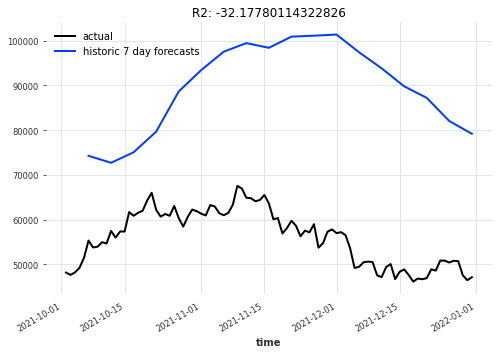

In [ ]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp("2021-10-1"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(pred_series, series, "7 day", start_date=pd.Timestamp("2021-10-1"))

# LSTM

In [ ]:
my_model = RNNModel(
    model="LSTM",
    hidden_dim=20,
    dropout=0.25,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    model_name="LSTM_Run",
    log_tensorboard=True,
    #random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    save_checkpoints=True,
)

In [ ]:
my_model.fit(
    train_transformed,
    future_covariates=None,
    val_series=val_transformed,
    val_future_covariates=None,
    verbose=True,
)

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
backtest_series = my_model.historical_forecasts(
    series_transformed,
    future_covariates=None,
    start=pd.Timestamp("2021-10-1"),
    forecast_horizon=6,
    retrain=False,
    verbose=True,
)

  0%|          | 0/87 [00:00<?, ?it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

  2%|▏         | 2/87 [00:00<00:06, 13.77it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

  5%|▍         | 4/87 [00:00<00:06, 12.37it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

  7%|▋         | 6/87 [00:00<00:06, 13.43it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

  9%|▉         | 8/87 [00:00<00:06, 12.02it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 11%|█▏        | 10/87 [00:00<00:06, 11.94it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 14%|█▍        | 12/87 [00:00<00:06, 12.32it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 16%|█▌        | 14/87 [00:01<00:05, 12.39it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 18%|█▊        | 16/87 [00:01<00:05, 12.48it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 21%|██        | 18/87 [00:01<00:05, 12.34it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 23%|██▎       | 20/87 [00:01<00:05, 12.40it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 25%|██▌       | 22/87 [00:01<00:05, 12.53it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 28%|██▊       | 24/87 [00:01<00:05, 11.71it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 30%|██▉       | 26/87 [00:02<00:05, 11.56it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 32%|███▏      | 28/87 [00:02<00:05, 11.76it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 34%|███▍      | 30/87 [00:02<00:04, 12.00it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 37%|███▋      | 32/87 [00:02<00:04, 12.18it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 39%|███▉      | 34/87 [00:02<00:04, 12.28it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 41%|████▏     | 36/87 [00:02<00:04, 12.50it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 44%|████▎     | 38/87 [00:03<00:03, 12.33it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 46%|████▌     | 40/87 [00:03<00:03, 12.28it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 48%|████▊     | 42/87 [00:03<00:03, 12.20it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 51%|█████     | 44/87 [00:03<00:03, 12.19it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 53%|█████▎    | 46/87 [00:03<00:03, 12.03it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 55%|█████▌    | 48/87 [00:03<00:03, 12.03it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 57%|█████▋    | 50/87 [00:04<00:03, 11.91it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 60%|█████▉    | 52/87 [00:04<00:02, 12.01it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 62%|██████▏   | 54/87 [00:04<00:02, 11.17it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 64%|██████▍   | 56/87 [00:04<00:02, 10.77it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 67%|██████▋   | 58/87 [00:04<00:02, 11.33it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 69%|██████▉   | 60/87 [00:05<00:02, 11.27it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 71%|███████▏  | 62/87 [00:05<00:02, 11.52it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 74%|███████▎  | 64/87 [00:05<00:01, 11.62it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 76%|███████▌  | 66/87 [00:05<00:01, 10.63it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 78%|███████▊  | 68/87 [00:05<00:01, 10.81it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 80%|████████  | 70/87 [00:05<00:01, 10.87it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 83%|████████▎ | 72/87 [00:06<00:01, 11.24it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 85%|████████▌ | 74/87 [00:06<00:01, 11.72it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 87%|████████▋ | 76/87 [00:06<00:00, 12.05it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 90%|████████▉ | 78/87 [00:06<00:00, 11.60it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 92%|█████████▏| 80/87 [00:06<00:00, 11.54it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 94%|█████████▍| 82/87 [00:06<00:00, 11.61it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 97%|█████████▋| 84/87 [00:07<00:00, 10.87it/s]

Predicting: 16it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

 99%|█████████▉| 86/87 [00:07<00:00, 11.47it/s]

Predicting: 16it [00:00, ?it/s]

100%|██████████| 87/87 [00:07<00:00, 11.72it/s]


MAPE: 7.13%


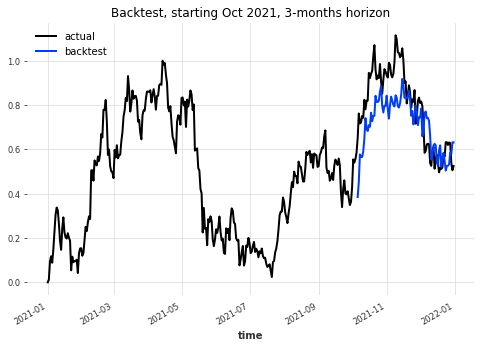

In [ ]:
plt.figure(figsize=(8, 5))
series_transformed.plot(label="actual")
backtest_series.plot(label="backtest")
plt.legend()
plt.title("Backtest, starting Oct 2021, 3-months horizon")
print(
    "MAPE: {:.2f}%".format(
        mape(
            transformer.inverse_transform(series_transformed),
            transformer.inverse_transform(backtest_series),
        )
    )
)